# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [7]:
# Your code here. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


student_data = pd.DataFrame(
    {'StudentID': [1,2,3,4,5,6,7,8,9,10], 'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54,30], 'Tardles': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]}
     )

student_data

,StudentID,Age,Tardles
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

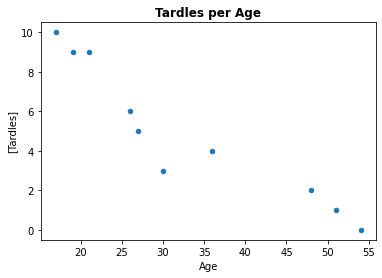

In [9]:
# Your code here.
student_data.plot.scatter(x="Age", y =["Tardles"]) 
plt.title('Tardles per Age', fontweight=700)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
The  hypothesis is there is a linear regression.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [11]:
# Your response here.
# Covariance is when two variables vary with each other.
# A positive number signifies positive covariance and denotes that there is a direct relationship.
# A negative number signifies negative covariance, which denotes an inverse relationship between the two variables.

covariance = np.cov(student_data['Age'], student_data['Tardles'])[0][1]
print('The covariance is: ', covariance)



# Correlation is when the change in one variable results in the change in another variable
corr = student_data['Age'].corr(student_data['Tardles'])
print('The correlation is: ', corr)

The covariance is:  -45.56666666666666
The corr is:  -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here.

from scipy import stats

X = student_data['Age']
Y = student_data['Tardles']

#slope is the coefficient between x and y
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)  # intercept = b0 or a0 the incerption that shows the value of y
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


In [ ]:
# Interpretation: y = 12.88 - 0.24x1 

Plot your regression model on your scatter plot.

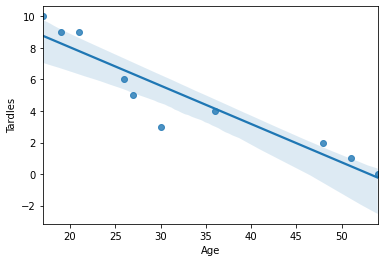

In [15]:
# Your code here.
sns.regplot(x="Age", y="Tardles", data=student_data)
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
Younger people are more late than the older.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [17]:
# Import any libraries you may need & the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Labs done\Labs module 2\Lab 16\vehicles\vehicles\vehicles.csv')
data.head(5)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [31]:
# Your response here. 
X = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']].head(5)

print('The correlation :')
print(vehicules.corr())
print('')
print('The most important variable in determining C02 is Cylinder.')
print('')
print('The variable which provides the least amount of helpful information for determining CO2 emission is the Combined MPG.')

The correlation :
                       Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year               1.000000   0.372678          -0.252099      0.218218   
Cylinders          0.372678   1.000000           0.720957     -0.731925   
Fuel Barrels/Year -0.252099   0.720957           1.000000     -0.998913   
Combined MPG       0.218218  -0.731925          -0.998913      1.000000   
Fuel Cost/Year     0.418854   0.983415           0.736093     -0.754062   

                   Fuel Cost/Year  
Year                     0.418854  
Cylinders                0.983415  
Fuel Barrels/Year        0.736093  
Combined MPG            -0.754062  
Fuel Cost/Year           1.000000  

The most important variable in determining C02 is Cylinder.

The variable which provides the least amount of helpful information for determining CO2 emission is the Combined MPG.


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [33]:
# Your response here.
import statsmodels.api as sm

X = sm.add_constant(X)  # we add a constant, here 12
model = sm.OLS(Y,X)  #we create the model
results = model.fit() 
predictions = results.predict(X) #calculation of y theoritical from my x

# y = a0 + a1X1 + a2x2+ ....
# y = 12 + 0.01145 + 

ValueError: The indices for endog and exog are not aligned

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [27]:
# Your code here. 
data1 = pd.DataFrame(
    {'X': [1,2,3,4,5,6,7,8,9,10], 'Y': [17, 51, 27, 21, 36, 48, 19, 26, 54,30]}
     )

data1.head(5)

,X,Y
0,1,17
1,2,51
2,3,27
3,4,21
4,5,36


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

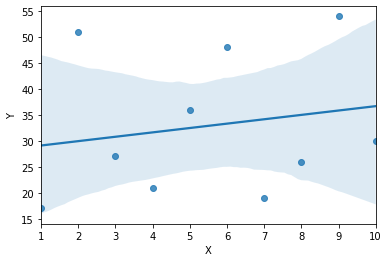

In [29]:
# Your code here.
sns.regplot(x="X", y="Y", data=data1)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [30]:
# Your response here. 
print('There is no relation between the variable.')

There is no relation between the variable.


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 